In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [152]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"


/content/drive/My Drive/Colab Notebooks/dw_matrix


In [8]:
df=pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [11]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_true.shape[0]
price_log_mean = np.exp( np.mean( np.log1p(y_true)  )) -1

In [0]:
y_pred = [np.median(y_true)] * y_true.shape[0]

In [32]:
mean_absolute_error(y_true, y_pred)

58.01120240700219

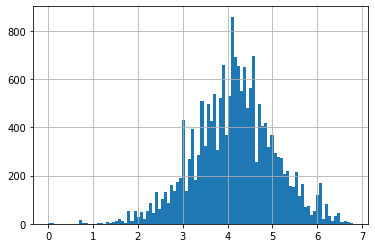

In [19]:
np.log( df['prices_amountmin']+ 1).hist(bins=100)

In [33]:
y_true = df['prices_amountmin']
price_log_mean = np.exp( np.mean( np.log1p(y_true)  )) -1
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [35]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [61]:
df.brand.value_counts()

Nike                                1709
PUMA                                 574
Ralph Lauren                         524
New Balance                          361
VANS                                 356
                                    ... 
Pentair                                1
Sean John                              1
Nike SB                                1
LUOS CULTURAL GOODS (USA SELLER)       1
HUDSON                                 1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [69]:
feats = ['brand_cat']
x = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
 x = df[feats].values
 y = df['prices_amountmin'].values

 model = DecisionTreeRegressor(max_depth=5)

 scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
 return np.mean(scores), np.std(scores)

In [75]:
run_model (['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [84]:
df.colors.value_counts() #zadanie 1 
df['colors_cat'] = df['colors'].factorize()[0]
feats = ['colors_cat']
run_model (['colors_cat'])

(-62.72404880129134, 5.053649873215771)

In [83]:
run_model (['colors_cat', 'brand_cat']) #zadanie 2

(-61.4460058212821, 5.444747383187671)

In [155]:
ls matrix_one

Day3.ipynb  day4.ipynb


In [156]:
!git add dw_matrix/matrix_one/day4.ipynb

fatal: pathspec 'dw_matrix/matrix_one/day4.ipynb' did not match any files


In [0]:
!git commit -m "Mój pierwszy model"
!git push -u origin master
!git config --global user.email "weronika.lach@walestead-ce.com"
!git config --global user.name "Weronika"